In [1]:
!pip install kaggle

In [2]:
import os
os.mkdir('/content/kaggle')

In [3]:
import json
token = {"username":"prabhatale","key":"a17630a4aed5ea80bd008176986b2036"}
with open('/content/kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [6]:
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [7]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia -p /content

 99% 1.64G/1.65G [00:49<00:00, 30.5MB/s]
100% 1.65G/1.65G [00:49<00:00, 36.1MB/s]


In [10]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset -p /content

 98% 155M/158M [00:07<00:00, 18.5MB/s]
100% 158M/158M [00:08<00:00, 20.7MB/s]


In [11]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content

100% 2.29G/2.29G [01:04<00:00, 69.3MB/s]
100% 2.29G/2.29G [01:04<00:00, 38.3MB/s]


In [12]:
!kaggle datasets download -d fusicfenta/chest-xray-for-covid19-detection -p /content

 92% 162M/176M [00:05<00:00, 26.2MB/s]
100% 176M/176M [00:05<00:00, 33.2MB/s]


In [13]:
import zipfile
archive1 = zipfile.ZipFile('/content/chest-xray-covid19-pneumonia.zip')
archive1.extractall('/content')

In [14]:
archive2 = zipfile.ZipFile('/content/chest-xray-for-covid19-detection.zip')
archive2.extractall('/content')

In [15]:
archive3 = zipfile.ZipFile('/content/chest-xray-pneumonia.zip')
archive3.extractall('/content')

In [16]:
archive4 = zipfile.ZipFile('/content/covid19-image-dataset.zip')
archive4.extractall('/content')

In [17]:
xray_types = ['COVID19','NORMAL','PNEUMONIA']

In [18]:
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Data/train',category))),category))

There are 460 COVID19 images
There are 1266 NORMAL images
There are 3418 PNEUMONIA images


In [19]:
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Data/test',category))),category))

There are 116 COVID19 images
There are 317 NORMAL images
There are 855 PNEUMONIA images


In [20]:
import os
os.mkdir('/content/Covid19&Pneumonia-Dataset')
os.mkdir('/content/Covid19&Pneumonia-Dataset/train')
os.mkdir('/content/Covid19&Pneumonia-Dataset/test')
os.mkdir('/content/Covid19&Pneumonia-Dataset/val')
os.mkdir('/content/Covid19&Pneumonia-Dataset/val/COVID19')
os.mkdir('/content/Covid19&Pneumonia-Dataset/val/NORMAL')
os.mkdir('/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA')

In [21]:
import shutil
import os
def copy_image(src, dst, symlinks=False, ignore=None):
  for item in os.listdir(src):  
    s = os.path.join(src, item)
    d = os.path.join(dst, item)
    if os.path.exists(d):
      try:
        shutil.rmtree(d)
      except Exception as e:
        print(e)
        os.unlink(d)
    if os.path.isdir(s):
      shutil.copytree(s, d, symlinks, ignore)
    else:
      shutil.copy2(s, d)

In [22]:
copy_image('/content/Data','/content/Covid19&Pneumonia-Dataset')

In [23]:
print("__________________________Train______________________________________________")
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/train',category))),category))

print("__________________________Valid______________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/val',category))),category))

print("____________________________Test_____________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/test',category))),category))


__________________________Train______________________________________________
There are 460 COVID19 images
There are 1266 NORMAL images
There are 3418 PNEUMONIA images
__________________________Valid______________________________________________
There are 0 COVID19 images
There are 0 NORMAL images
There are 0 PNEUMONIA images
____________________________Test_____________________________________________
There are 116 COVID19 images
There are 317 NORMAL images
There are 855 PNEUMONIA images


In [24]:
os.rename('/content/Dataset/Train/Covid','/content/Dataset/Train/COVID19')
os.rename('/content/Dataset/Train/Normal','/content/Dataset/Train/NORMAL')
os.rename('/content/Dataset/Val/Covid','/content/Dataset/Val/COVID19')
os.rename('/content/Dataset/Val/Normal','/content/Dataset/Val/NORMAL')

In [25]:
os.rename('/content/Covid19-dataset/train/Covid','/content/Covid19-dataset/train/COVID19')
os.rename('/content/Covid19-dataset/train/Normal','/content/Covid19-dataset/train/NORMAL')
os.rename('/content/Covid19-dataset/train/Viral Pneumonia','/content/Covid19-dataset/train/PNEUMONIA')
os.rename('/content/Covid19-dataset/test/Covid','/content/Covid19-dataset/test/COVID19')
os.rename('/content/Covid19-dataset/test/Normal','/content/Covid19-dataset/test/NORMAL')
os.rename('/content/Covid19-dataset/test/Viral Pneumonia','/content/Covid19-dataset/test/PNEUMONIA')

In [26]:
print("_____________________________________Train________________________________________________________")
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19-dataset/train',category))),category))

print("______________________________________Test_________________________________________________________")
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19-dataset/test',category))),category))

_____________________________________Train________________________________________________________
There are 111 COVID19 images
There are 70 NORMAL images
There are 70 PNEUMONIA images
______________________________________Test_________________________________________________________
There are 26 COVID19 images
There are 20 NORMAL images
There are 20 PNEUMONIA images


In [27]:
def get_image_paths(dataset_dir,data_split_type,categories):
  img_paths = []
  path = os.path.join(dataset_dir,data_split_type)
  for category in categories:
    new_path = os.path.join(path,category)
    for img in os.listdir(new_path):
      img_path = os.path.join(new_path,img)
      img_paths.append(img_path)
  return img_paths

In [28]:
import cv2
def copy_images_to_maindataset(source_imagepaths,dataset_base_path,split_type):
  path = os.path.join(dataset_base_path,split_type)
  for img_path in source_imagepaths:
    try:
      category = img_path.split('/')[-2]
      new_path = os.path.join(path,category)
      img_name = img_path.split('/')[-1]
      img_array = cv2.imread(img_path)
      cv2.imwrite(os.path.join(new_path,img_name),img_array)
    except Exception as e:
      pass
    

In [29]:
dataset_train_image_paths = get_image_paths(dataset_dir='/content/Covid19-dataset',data_split_type='train',categories=['COVID19','NORMAL','PNEUMONIA'])
print(len(dataset_train_image_paths))
print(dataset_train_image_paths)

251
['/content/Covid19-dataset/train/COVID19/051.jpeg', '/content/Covid19-dataset/train/COVID19/06.jpeg', '/content/Covid19-dataset/train/COVID19/COVID-00009.jpg', '/content/Covid19-dataset/train/COVID19/041.jpeg', '/content/Covid19-dataset/train/COVID19/021.jpeg', '/content/Covid19-dataset/train/COVID19/COVID-00034.jpg', '/content/Covid19-dataset/train/COVID19/COVID-00013a.jpg', '/content/Covid19-dataset/train/COVID19/059.jpeg', '/content/Covid19-dataset/train/COVID19/COVID-00025.jpg', '/content/Covid19-dataset/train/COVID19/012.jpeg', '/content/Covid19-dataset/train/COVID19/09.png', '/content/Covid19-dataset/train/COVID19/062.jpeg', '/content/Covid19-dataset/train/COVID19/052.jpeg', '/content/Covid19-dataset/train/COVID19/COVID-00001.jpg', '/content/Covid19-dataset/train/COVID19/020.jpg', '/content/Covid19-dataset/train/COVID19/COVID-00018.jpg', '/content/Covid19-dataset/train/COVID19/058.jpeg', '/content/Covid19-dataset/train/COVID19/COVID-00002.jpg', '/content/Covid19-dataset/train

In [30]:
copy_images_to_maindataset(source_imagepaths=dataset_train_image_paths,dataset_base_path="/content/Covid19&Pneumonia-Dataset",split_type='train')

In [31]:
dataset_test_image_paths = get_image_paths(dataset_dir='/content/Covid19-dataset',data_split_type='test',categories=['COVID19','NORMAL','PNEUMONIA'])
print(dataset_test_image_paths)
print(len(dataset_test_image_paths))

['/content/Covid19-dataset/test/COVID19/094.png', '/content/Covid19-dataset/test/COVID19/0120.jpg', '/content/Covid19-dataset/test/COVID19/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '/content/Covid19-dataset/test/COVID19/0102.jpeg', '/content/Covid19-dataset/test/COVID19/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '/content/Covid19-dataset/test/COVID19/COVID-00022.jpg', '/content/Covid19-dataset/test/COVID19/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '/content/Covid19-dataset/test/COVID19/auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg', '/content/Covid19-dataset/test/COVID19/0113.jpg', '/content/Covid19-dataset/test/COVID19/COVID-00037.jpg', '/content/Covid19-dataset/test/COVID19/0118.jpeg', '/content/Covid19-dataset/test/COVID19/0100.jpeg', '/content/Covid19-dataset/test/COVID19/COVID-00012.jpg', '/content/Covid19-dataset/test/COVID19/098.jpeg', '/content/Covid19-dataset/test

In [32]:
copy_images_to_maindataset(source_imagepaths=dataset_test_image_paths,dataset_base_path="/content/Covid19&Pneumonia-Dataset",split_type='test')

In [33]:
print("__________________________Train______________________________________________")
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/train',category))),category))

print("__________________________Valid______________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/val',category))),category))

print("____________________________Test_____________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/test',category))),category))

__________________________Train______________________________________________
There are 571 COVID19 images
There are 1336 NORMAL images
There are 3488 PNEUMONIA images
__________________________Valid______________________________________________
There are 0 COVID19 images
There are 0 NORMAL images
There are 0 PNEUMONIA images
____________________________Test_____________________________________________
There are 142 COVID19 images
There are 337 NORMAL images
There are 875 PNEUMONIA images


In [34]:
print("_____________________________________Train________________________________________________________")
for category in xray_types[:2]:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Dataset/Train',category))),category))

print("______________________________________Validation_________________________________________________________")
for category in xray_types[:2]:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Dataset/Val',category))),category))

_____________________________________Train________________________________________________________
There are 144 COVID19 images
There are 144 NORMAL images
______________________________________Validation_________________________________________________________
There are 30 COVID19 images
There are 30 NORMAL images


In [35]:
dataset_train_image_paths = get_image_paths(dataset_dir='/content/Dataset',data_split_type='Train',categories=['COVID19','NORMAL'])
print(len(dataset_train_image_paths))
print(dataset_train_image_paths)

288
['/content/Dataset/Train/COVID19/nCoV-radiol.2020200269.fig1-day7.jpeg', '/content/Dataset/Train/COVID19/AR-2.jpg', '/content/Dataset/Train/COVID19/1-s2.0-S0929664620300449-gr2_lrg-d.jpg', '/content/Dataset/Train/COVID19/covid-19-infection-exclusive-gastrointestinal-symptoms-pa.png', '/content/Dataset/Train/COVID19/covid-19-pneumonia-44-day-0.jpeg', '/content/Dataset/Train/COVID19/ryct.2020200034.fig5-day0.jpeg', '/content/Dataset/Train/COVID19/1-s2.0-S0140673620303706-fx1_lrg.jpg', '/content/Dataset/Train/COVID19/1-s2.0-S0929664620300449-gr2_lrg-a.jpg', '/content/Dataset/Train/COVID19/ciaa199.pdf-001-a.png', '/content/Dataset/Train/COVID19/lancet-case2b.jpg', '/content/Dataset/Train/COVID19/1-s2.0-S0929664620300449-gr2_lrg-b.jpg', '/content/Dataset/Train/COVID19/16654_2_1.jpg', '/content/Dataset/Train/COVID19/1-s2.0-S1684118220300682-main.pdf-003-b2.png', '/content/Dataset/Train/COVID19/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '/content/Dataset/Train/COVID19/covid-19-pneumonia-

In [36]:
copy_images_to_maindataset(source_imagepaths=dataset_train_image_paths,dataset_base_path="/content/Covid19&Pneumonia-Dataset",split_type='train')

In [37]:
dataset_val_image_paths = get_image_paths(dataset_dir='/content/Dataset',data_split_type='Val',categories=['COVID19','NORMAL'])
print(dataset_val_image_paths)
print(len(dataset_val_image_paths))

['/content/Dataset/Val/COVID19/16654_2_1.jpg', '/content/Dataset/Val/COVID19/23E99E2E-447C-46E5-8EB2-D35D12473C39.png', '/content/Dataset/Val/COVID19/6C94A287-C059-46A0-8600-AFB95F4727B7.jpeg', '/content/Dataset/Val/COVID19/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg', '/content/Dataset/Val/COVID19/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg', '/content/Dataset/Val/COVID19/6b44464d-73a7-4cf3-bbb6-ffe7168300e3.annot.original.jpeg', '/content/Dataset/Val/COVID19/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg', '/content/Dataset/Val/COVID19/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg', '/content/Dataset/Val/COVID19/B2D20576-00B7-4519-A415-72DE29C90C34.jpeg', '/content/Dataset/Val/COVID19/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '/content/Dataset/Val/COVID19/covid-19-pneumonia-14-PA.png', '/content/Dataset/Val/COVID19/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg', '/content/Dataset/Val/COVID19/covid-19-pneumonia-53.jpg', '/content/Dataset/Val/COVID19/53EC07C9-5CC6-4BE

In [38]:
copy_images_to_maindataset(source_imagepaths=dataset_val_image_paths,dataset_base_path="/content/Covid19&Pneumonia-Dataset",split_type='val')

In [39]:
print("__________________________Train______________________________________________")
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/train',category))),category))

print("__________________________Valid______________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/val',category))),category))

print("____________________________Test_____________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/test',category))),category))

__________________________Train______________________________________________
There are 715 COVID19 images
There are 1480 NORMAL images
There are 3488 PNEUMONIA images
__________________________Valid______________________________________________
There are 30 COVID19 images
There are 30 NORMAL images
There are 0 PNEUMONIA images
____________________________Test_____________________________________________
There are 142 COVID19 images
There are 337 NORMAL images
There are 875 PNEUMONIA images


In [40]:
print("__________________________Train______________________________________________")
for category in xray_types[1:]:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/chest_xray/chest_xray/train',category))),category))

print("__________________________Valid______________________________________________")

for category in xray_types[1:]:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/chest_xray/chest_xray/val',category))),category))

print("____________________________Test_____________________________________________")

for category in xray_types[1:]:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/chest_xray/chest_xray/test',category))),category))

__________________________Train______________________________________________
There are 1342 NORMAL images
There are 3876 PNEUMONIA images
__________________________Valid______________________________________________
There are 9 NORMAL images
There are 9 PNEUMONIA images
____________________________Test_____________________________________________
There are 234 NORMAL images
There are 390 PNEUMONIA images


In [41]:
dataset_train_image_paths = get_image_paths(dataset_dir='/content/chest_xray/chest_xray',data_split_type='train',categories=['NORMAL','PNEUMONIA'])
print(len(dataset_train_image_paths))
print(dataset_train_image_paths)

5218
['/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1345-0001-0002.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/IM-0739-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/IM-0240-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0490-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/IM-0429-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/IM-0176-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/IM-0303-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0453-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1177-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0852-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0994-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1274-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/IM-0734-0001.jpeg', '/content/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0649-0001.jpeg', '/content/chest

In [42]:
copy_images_to_maindataset(source_imagepaths=dataset_train_image_paths,dataset_base_path="/content/Covid19&Pneumonia-Dataset",split_type='train')

In [43]:
dataset_test_image_paths = get_image_paths(dataset_dir='/content/chest_xray/chest_xray',data_split_type='test',categories=['NORMAL','PNEUMONIA'])
print(len(dataset_test_image_paths))
print(dataset_test_image_paths)

624
['/content/chest_xray/chest_xray/test/NORMAL/IM-0069-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0201-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0112-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0107-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/IM-0007-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0328-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0316-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0081-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/IM-0022-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/IM-0036-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/IM-0029-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0278-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/IM-0103-0001.jpeg', '/content/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0102-0001.jpeg', '/content/chest_xray/chest_xray/tes

In [44]:
copy_images_to_maindataset(source_imagepaths=dataset_test_image_paths,dataset_base_path="/content/Covid19&Pneumonia-Dataset",split_type='test')

In [45]:
dataset_valid_image_paths = get_image_paths(dataset_dir='/content/chest_xray/chest_xray',data_split_type='val',categories=['NORMAL','PNEUMONIA'])
print(len(dataset_valid_image_paths))
print(dataset_valid_image_paths)

18
['/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg', '/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg', '/content/chest_xray/chest_xray/val/NORMAL/.DS_Store', '/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg', '/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg', '/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg', '/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg', '/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg', '/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg', '/content/chest_xray/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg', '/content/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg', '/content/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store', '/content/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg', '/content/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg', '/c

In [46]:
copy_images_to_maindataset(source_imagepaths=dataset_valid_image_paths,dataset_base_path="/content/Covid19&Pneumonia-Dataset",split_type='val')

In [47]:
print("__________________________Train______________________________________________")
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/train',category))),category))

print("__________________________Valid______________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/val',category))),category))

print("____________________________Test_____________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/test',category))),category))

__________________________Train______________________________________________
There are 715 COVID19 images
There are 2677 NORMAL images
There are 7363 PNEUMONIA images
__________________________Valid______________________________________________
There are 30 COVID19 images
There are 38 NORMAL images
There are 8 PNEUMONIA images
____________________________Test_____________________________________________
There are 142 COVID19 images
There are 571 NORMAL images
There are 1265 PNEUMONIA images


In [48]:
os.rename('/content/Covid19&Pneumonia-Dataset/test','/content/Covid19&Pneumonia-Dataset/Val')
os.rename('/content/Covid19&Pneumonia-Dataset/val','/content/Covid19&Pneumonia-Dataset/test')
os.rename('/content/Covid19&Pneumonia-Dataset/Val','/content/Covid19&Pneumonia-Dataset/val')

In [49]:
print("__________________________Train______________________________________________")
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/train',category))),category))

print("__________________________Valid______________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/val',category))),category))

print("____________________________Test_____________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/test',category))),category))

__________________________Train______________________________________________
There are 715 COVID19 images
There are 2677 NORMAL images
There are 7363 PNEUMONIA images
__________________________Valid______________________________________________
There are 142 COVID19 images
There are 571 NORMAL images
There are 1265 PNEUMONIA images
____________________________Test_____________________________________________
There are 30 COVID19 images
There are 38 NORMAL images
There are 8 PNEUMONIA images


In [50]:
import random
def select_random_images(generator_dir,no_of_samples):
  selected_samples = []
  selection = random.sample(os.listdir(generator_dir),no_of_samples)
  for choices in selection:
    choice = os.path.join(generator_dir,choices)
    selected_samples.append(choice)
  return selected_samples

In [51]:
valid_covid19_images = select_random_images(generator_dir='/content/Covid19&Pneumonia-Dataset/val/COVID19',no_of_samples=17)
print(valid_covid19_images)
print(len(valid_covid19_images))

['/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(158).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(459).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(375).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(177).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(343).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(198).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(255).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(569).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID-00012.jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(385).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(79).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(423).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/auntminnie-b-2020_01_28_23_5

In [52]:
import shutil
for img in valid_covid19_images:
  shutil.move(img,os.path.join('/content/Covid19&Pneumonia-Dataset/test/COVID19',img.split('/')[-1]))

In [53]:
train_covid19_images = select_random_images(generator_dir='/content/Covid19&Pneumonia-Dataset/train/COVID19',no_of_samples=3)
print(train_covid19_images)
print(len(train_covid19_images))

['/content/Covid19&Pneumonia-Dataset/train/COVID19/COVID19(553).jpg', '/content/Covid19&Pneumonia-Dataset/train/COVID19/16654_2_1.jpg', '/content/Covid19&Pneumonia-Dataset/train/COVID19/COVID19(299).jpg']
3


In [54]:
import shutil
for img in train_covid19_images:
  shutil.move(img,os.path.join('/content/Covid19&Pneumonia-Dataset/test/COVID19',img.split('/')[-1]))

In [55]:
print("__________________________Train______________________________________________")
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/train',category))),category))

print("__________________________Valid______________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/val',category))),category))

print("____________________________Test_____________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/test',category))),category))

__________________________Train______________________________________________
There are 712 COVID19 images
There are 2677 NORMAL images
There are 7363 PNEUMONIA images
__________________________Valid______________________________________________
There are 125 COVID19 images
There are 571 NORMAL images
There are 1265 PNEUMONIA images
____________________________Test_____________________________________________
There are 48 COVID19 images
There are 38 NORMAL images
There are 8 PNEUMONIA images


In [56]:
valid_normal_images = select_random_images(generator_dir='/content/Covid19&Pneumonia-Dataset/val/NORMAL',no_of_samples=12)
print(valid_normal_images)
print(len(valid_normal_images))

['/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL(486).jpg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL2-IM-0095-0001.jpeg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL2-IM-0131-0001.jpeg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL2-IM-0033-0001.jpeg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/0111.jpeg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL(1432).jpg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL(632).jpg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL(192).jpg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL(845).jpg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL(1371).jpg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL2-IM-0373-0001.jpeg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/IM-0083-0001.jpeg']
12


In [57]:
import shutil
for img in valid_normal_images:
  shutil.move(img,os.path.join('/content/Covid19&Pneumonia-Dataset/test/NORMAL',img.split('/')[-1]))

In [58]:
print("__________________________Train______________________________________________")
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/train',category))),category))

print("__________________________Valid______________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/val',category))),category))

print("____________________________Test_____________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/test',category))),category))

__________________________Train______________________________________________
There are 712 COVID19 images
There are 2677 NORMAL images
There are 7363 PNEUMONIA images
__________________________Valid______________________________________________
There are 125 COVID19 images
There are 559 NORMAL images
There are 1265 PNEUMONIA images
____________________________Test_____________________________________________
There are 48 COVID19 images
There are 50 NORMAL images
There are 8 PNEUMONIA images


In [59]:
valid_pneumonia_images = select_random_images(generator_dir='/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA',no_of_samples=42)
print(valid_pneumonia_images)
print(len(valid_pneumonia_images))

['/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/person109_bacteria_526.jpeg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/person47_virus_99.jpeg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/person87_bacteria_433.jpeg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/PNEUMONIA(2847).jpg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/PNEUMONIA(1964).jpg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/PNEUMONIA(331).jpg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/PNEUMONIA(3679).jpg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/person1661_virus_2873.jpeg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/PNEUMONIA(3460).jpg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/person91_bacteria_447.jpeg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/PNEUMONIA(1599).jpg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/0118.jpeg', '/content/Covid19&Pneumonia-Dataset/val/PNEUMONIA/person150_bacteria_717.jpeg', '/content/Covid19&Pneumonia-Datase

In [60]:
import shutil
for img in valid_pneumonia_images:
  shutil.move(img,os.path.join('/content/Covid19&Pneumonia-Dataset/test/PNEUMONIA',img.split('/')[-1]))

In [61]:
print("__________________________Train______________________________________________")
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/train',category))),category))

print("__________________________Valid______________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/val',category))),category))

print("____________________________Test_____________________________________________")

for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join('/content/Covid19&Pneumonia-Dataset/test',category))),category))

__________________________Train______________________________________________
There are 712 COVID19 images
There are 2677 NORMAL images
There are 7363 PNEUMONIA images
__________________________Valid______________________________________________
There are 125 COVID19 images
There are 559 NORMAL images
There are 1223 PNEUMONIA images
____________________________Test_____________________________________________
There are 48 COVID19 images
There are 50 NORMAL images
There are 50 PNEUMONIA images


In [62]:
!rm -rf "/content/Covid19-dataset"
!rm -rf "/content/Data"
!rm -rf "/content/Dataset"
!rm -rf "/content/chest_xray"
!rm -rf "/content/chest-xray-covid19-pneumonia.zip"
!rm -rf "/content/chest-xray-for-covid19-detection.zip"
!rm -rf "/content/chest-xray-pneumonia.zip"
!rm -rf "/content/covid19-image-dataset.zip"

In [63]:
# Image Visualization


In [64]:
def image_paths_for_visualizaton(base_data_dir,split_type,no_of_samples):
  image_paths = []
  path = os.path.join(base_data_dir,split_type)
  for category in xray_types:
    new_path = os.path.join(path,category)
    i = 1
    for img in os.listdir(new_path):
      if i > no_of_samples:
        break
      image_paths.append(os.path.join(new_path,img))
      i+= 1
  return image_paths

In [65]:
import matplotlib.pyplot as plt
import cv2
def visualize_images(imagepaths,rows,cols):
  fig = plt.figure(figsize=(20,20))
  rows = rows
  cols = cols
  for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(imagepaths[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(imagepaths[i-1].split('/')[-2])
  plt.show()

In [66]:
train_image_paths = image_paths_for_visualizaton(base_data_dir='/content/Covid19&Pneumonia-Dataset',split_type='train',
                                                 no_of_samples=10)
print(train_image_paths)
print(len(train_image_paths))

['/content/Covid19&Pneumonia-Dataset/train/COVID19/COVID19(368).jpg', '/content/Covid19&Pneumonia-Dataset/train/COVID19/COVID19(524).jpg', '/content/Covid19&Pneumonia-Dataset/train/COVID19/COVID19(374).jpg', '/content/Covid19&Pneumonia-Dataset/train/COVID19/COVID19(230).jpg', '/content/Covid19&Pneumonia-Dataset/train/COVID19/051.jpeg', '/content/Covid19&Pneumonia-Dataset/train/COVID19/nCoV-radiol.2020200269.fig1-day7.jpeg', '/content/Covid19&Pneumonia-Dataset/train/COVID19/COVID19(369).jpg', '/content/Covid19&Pneumonia-Dataset/train/COVID19/06.jpeg', '/content/Covid19&Pneumonia-Dataset/train/COVID19/AR-2.jpg', '/content/Covid19&Pneumonia-Dataset/train/COVID19/COVID19(511).jpg', '/content/Covid19&Pneumonia-Dataset/train/NORMAL/NORMAL2-IM-1345-0001-0002.jpeg', '/content/Covid19&Pneumonia-Dataset/train/NORMAL/NORMAL(41).jpg', '/content/Covid19&Pneumonia-Dataset/train/NORMAL/NORMAL(249).jpg', '/content/Covid19&Pneumonia-Dataset/train/NORMAL/IM-0739-0001.jpeg', '/content/Covid19&Pneumonia-D

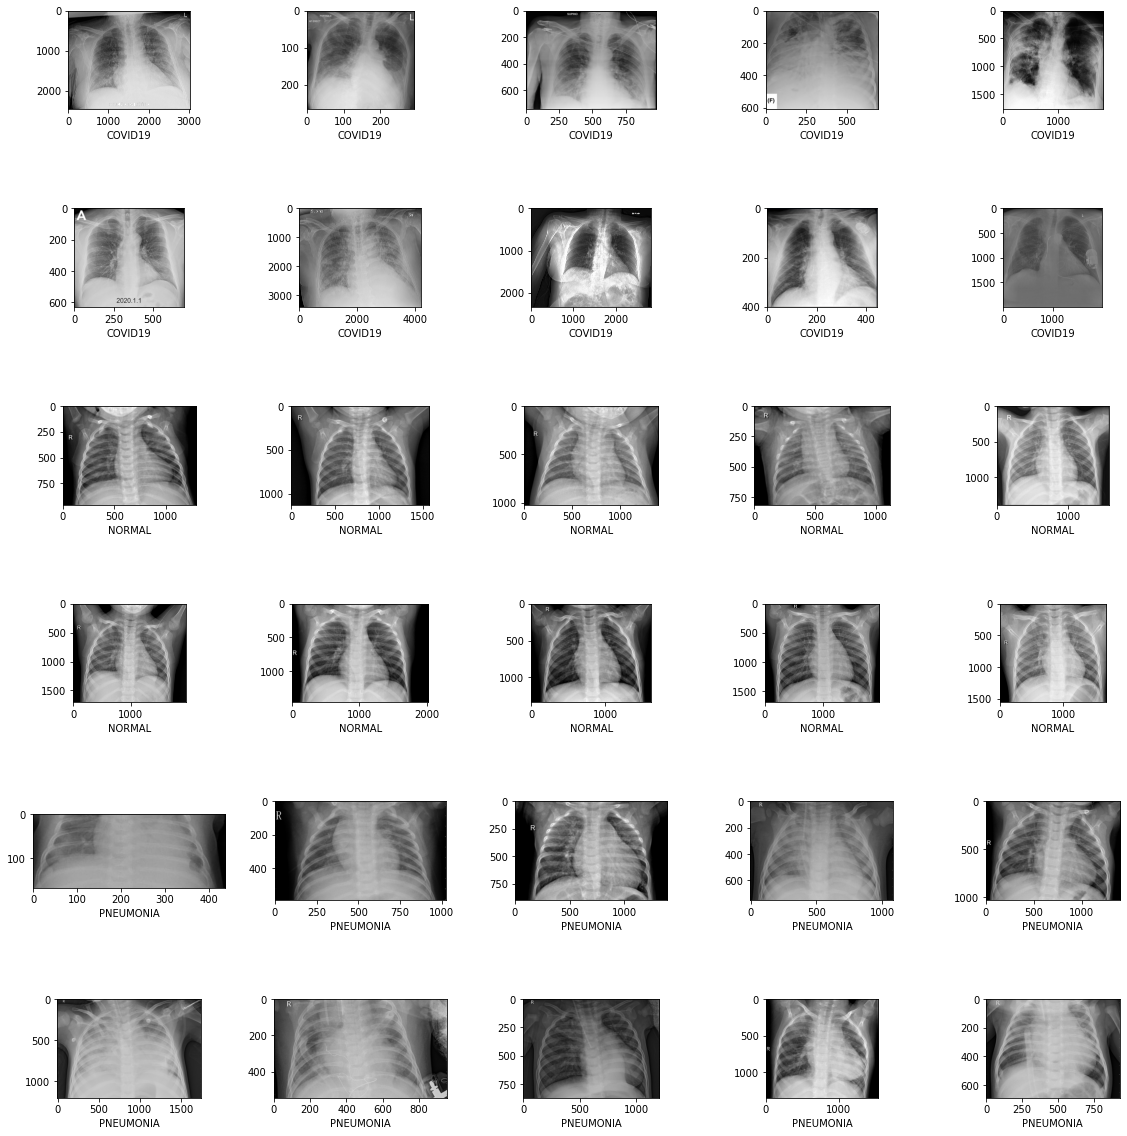

In [67]:
visualize_images(train_image_paths,rows=6,cols=5)

In [68]:
test_image_paths = image_paths_for_visualizaton(base_data_dir='/content/Covid19&Pneumonia-Dataset',split_type='test',
                                                 no_of_samples=10)
print(test_image_paths)
print(len(test_image_paths))

['/content/Covid19&Pneumonia-Dataset/test/COVID19/COVID19(459).jpg', '/content/Covid19&Pneumonia-Dataset/test/COVID19/16654_2_1.jpg', '/content/Covid19&Pneumonia-Dataset/test/COVID19/23E99E2E-447C-46E5-8EB2-D35D12473C39.png', '/content/Covid19&Pneumonia-Dataset/test/COVID19/COVID19(569).jpg', '/content/Covid19&Pneumonia-Dataset/test/COVID19/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '/content/Covid19&Pneumonia-Dataset/test/COVID19/6C94A287-C059-46A0-8600-AFB95F4727B7.jpeg', '/content/Covid19&Pneumonia-Dataset/test/COVID19/COVID19(198).jpg', '/content/Covid19&Pneumonia-Dataset/test/COVID19/COVID19(79).jpg', '/content/Covid19&Pneumonia-Dataset/test/COVID19/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg', '/content/Covid19&Pneumonia-Dataset/test/COVID19/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg', '/content/Covid19&Pneumonia-Dataset/test/NORMAL/NORMAL2-IM-1431-0001.jpeg', '/content/Covid19&Pneumonia-Dataset/test/NORMAL/NORMAL(845).jpg', '/content/Covid19&Pneumonia-

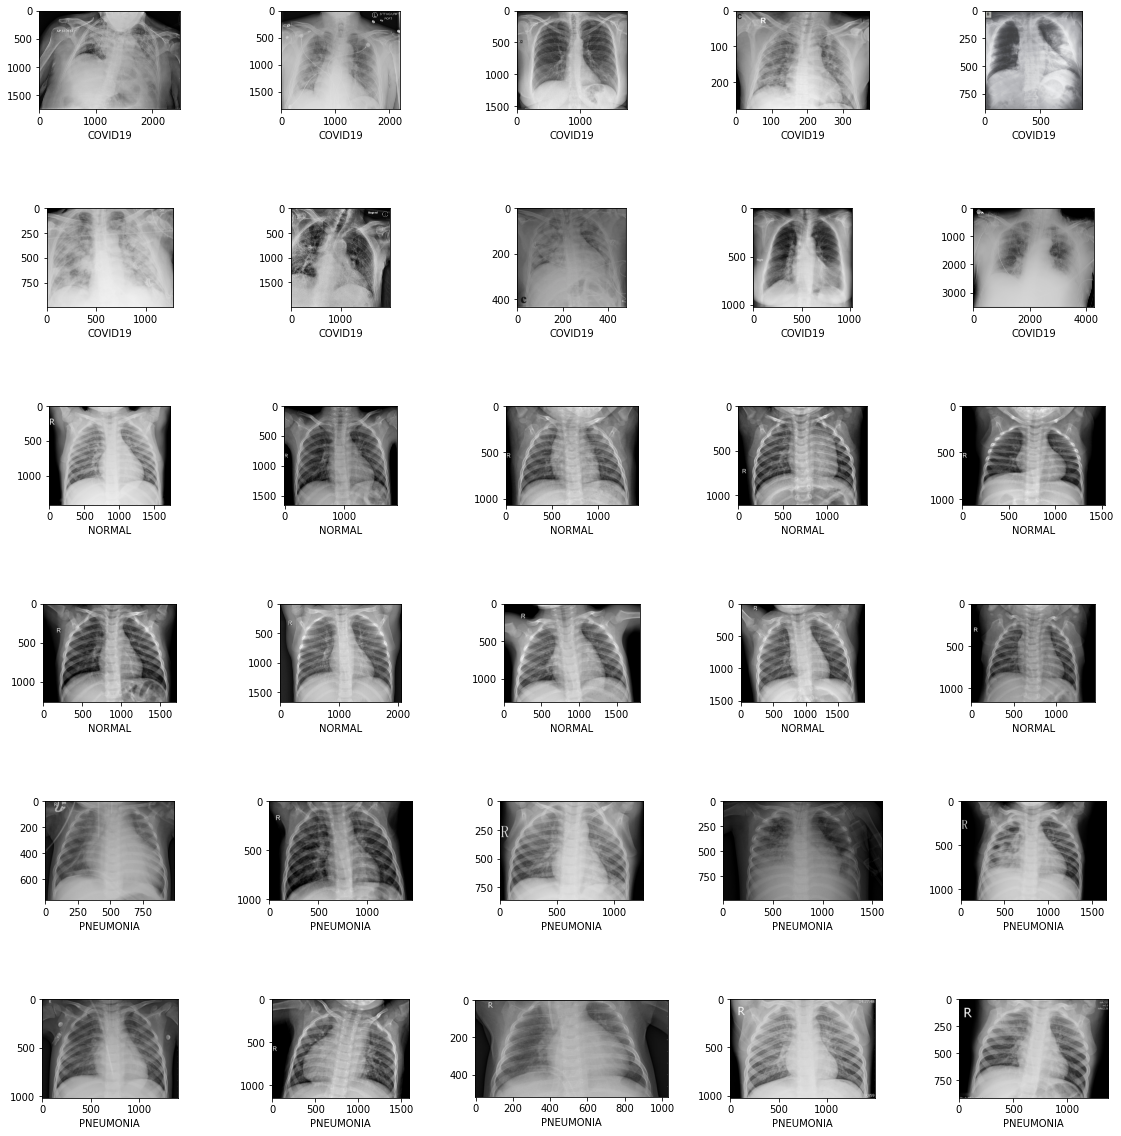

In [69]:
visualize_images(test_image_paths,rows=6,cols=5)

In [70]:
valid_image_paths = image_paths_for_visualizaton(base_data_dir='/content/Covid19&Pneumonia-Dataset',split_type='val',
                                                 no_of_samples=10)
print(valid_image_paths)
print(len(valid_image_paths))

['/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(562).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(197).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(106).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(8).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(490).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(455).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/094.png', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(482).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(13).jpg', '/content/Covid19&Pneumonia-Dataset/val/COVID19/COVID19(472).jpg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL(415).jpg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL(889).jpg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/IM-0069-0001.jpeg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL(795).jpg', '/content/Covid19&Pneumonia-Dataset/val/NORMAL/NORMAL(412).jpg', '/content/Covi

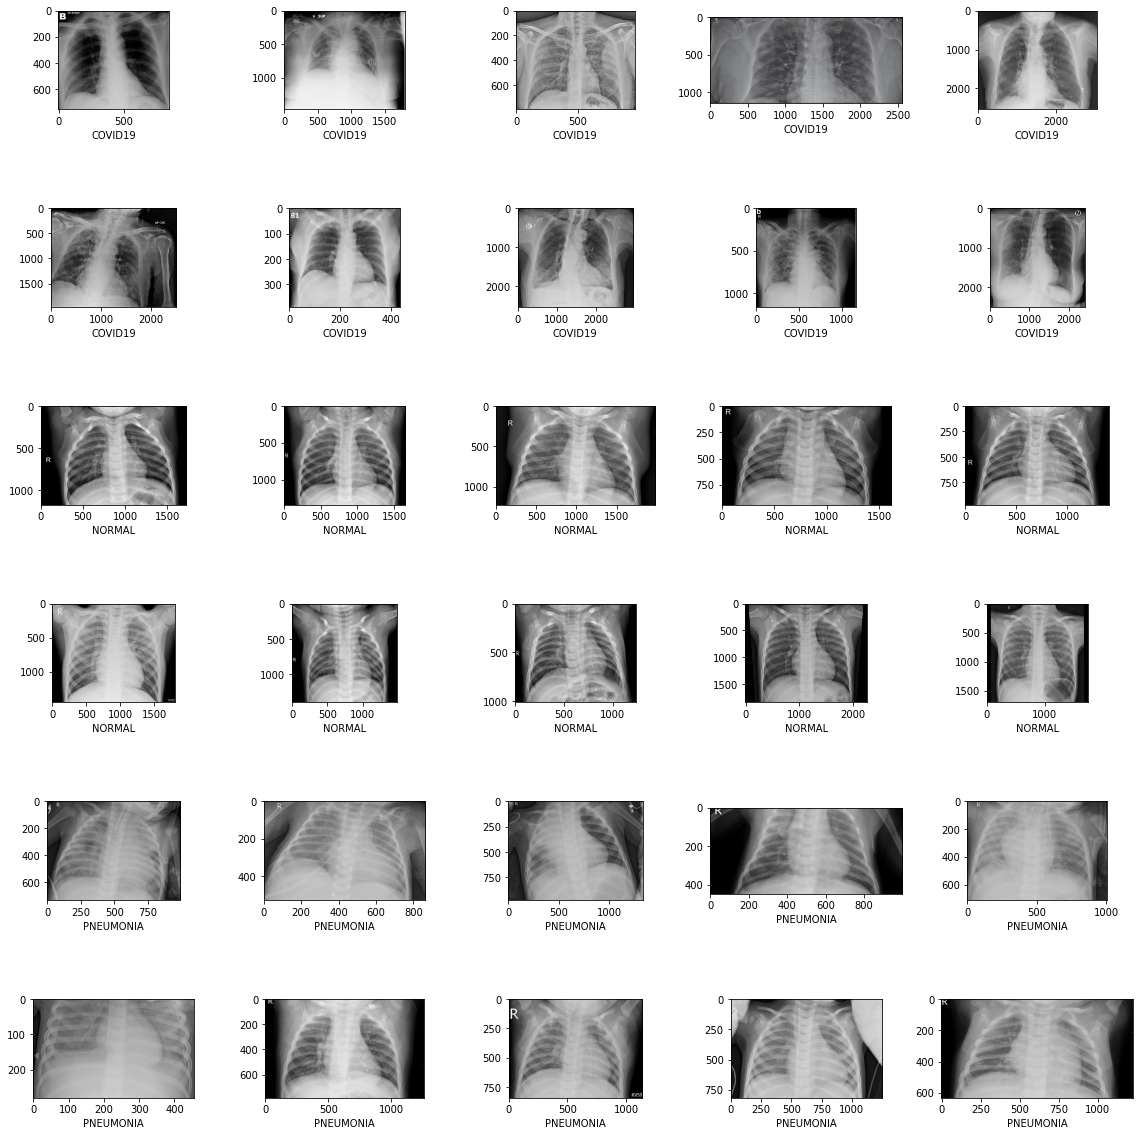

In [71]:
visualize_images(valid_image_paths,rows=6,cols=5)

In [72]:
# def get_shapes(base_dir,split_type,categories):
#   image_shapes = {}
#   path = os.path.join(base_dir,split_type)
#   print(path)
#   for category in categories:
#     update_path = os.path.join(path,category)
#     print(update_path)
#     for img in os.listdir(update_path):
#       img_array = cv2.imread(os.path.join(update_path,img))
#       img_shape = img_array.shape 
#       if img_shape not in image_shapes:
#         image_shapes[img_shape]= 1
#       else:
#         image_shapes[img_shape]+= 1
#   return image_shapes


In [73]:
# train_data_shapes_dictionary = get_shapes(base_dir='/content/Covid19&Pneumonia-Dataset',split_type='train',categories= xray_types)
# print(train_data_shapes_dictionary)
# print(len(train_data_shapes_dictionary))

In [74]:
# valid_data_shapes_dictionary = get_shapes(base_dir='/content/Covid19&Pneumonia-Dataset',split_type='val',categories=xray_types)
# print(valid_data_shapes_dictionary)
# print(len(valid_data_shapes_dictionary))

In [75]:
# test_data_shapes_dictionary = get_shapes(base_dir='/content/Covid19&Pneumonia-Dataset',split_type='test',categories=xray_types)
# print(test_data_shapes_dictionary)
# print(len(test_data_shapes_dictionary))

In [76]:
base_dir = '/content/Covid19&Pneumonia-Dataset'
train_dir = '/content/Covid19&Pneumonia-Dataset/train'
valid_dir = '/content/Covid19&Pneumonia-Dataset/val'
test_dir = '/content/Covid19&Pneumonia-Dataset/test'

In [77]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout,Flatten,Dense
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Model

Using TensorFlow backend.


In [78]:
train_datagen = ImageDataGenerator(rescale= 1/255.0,horizontal_flip=True,rotation_range=15,
                                   brightness_range=(0.4,1.4))

valid_datagen = ImageDataGenerator(rescale=1/255.0)

In [79]:
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(350,350),
                                                    color_mode='rgb',class_mode='categorical',
                                                    batch_size=25,shuffle=True)

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,target_size=(350,350),color_mode='rgb',
                                                    class_mode='categorical',batch_size=25,shuffle=True)

Found 10752 images belonging to 3 classes.
Found 1907 images belonging to 3 classes.


In [80]:
xception = Xception(weights='imagenet',include_top=False,input_shape=(350,350,3))

83689472/83683744 [==============================] - 7s 0us/step


In [81]:
xception.trainable = False

In [82]:
# # Let's take a look to see how many layers are in the base model
# print("Number of layers in the base model: ", len(resnet.layers))

# # Fine-tune from this layer onwards
# fine_tune_at = 170

# # Freeze all the layers before the `fine_tune_at` layer
# for layer in resnet.layers[:fine_tune_at]:
#   layer.trainable =  False

In [83]:
output = Flatten()(xception.output)
output = Dropout(0.3)(output)
prediction = Dense(3,activation='softmax')(output)

In [84]:
model = Model(inputs = xception.input,outputs = prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 350, 350, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 174, 174, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 174, 174, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 174, 174, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [85]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(
    learning_rate=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [86]:
import os
os.mkdir('/content/model_weights/')

In [87]:
model_checkpoint = ModelCheckpoint('./model_weights/covid19_model_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // 25,
    epochs = 30,
    callbacks=[model_checkpoint])

Epoch 1/30
430/430 [==============================] - 879s 2s/step - loss: 0.2275 - accuracy: 0.9142 - val_loss: 0.2196 - val_accuracy: 0.9195

Epoch 00001: val_loss improved from inf to 0.21960, saving model to ./model_weights/covid19_model_01-0.919474.h5
Epoch 2/30
430/430 [==============================] - 861s 2s/step - loss: 0.0971 - accuracy: 0.9690 - val_loss: 0.0518 - val_accuracy: 0.9490

Epoch 00002: val_loss improved from 0.21960 to 0.05182, saving model to ./model_weights/covid19_model_02-0.948990.h5
Epoch 3/30
430/430 [==============================] - 857s 2s/step - loss: 0.0650 - accuracy: 0.9791 - val_loss: 0.1496 - val_accuracy: 0.9522

Epoch 00003: val_loss did not improve from 0.05182
Epoch 4/30
430/430 [==============================] - 850s 2s/step - loss: 0.0534 - accuracy: 0.9821 - val_loss: 0.0174 - val_accuracy: 0.9559

Epoch 00004: val_loss improved from 0.05182 to 0.01742, saving model to ./model_weights/covid19_model_04-0.955898.h5
Epoch 5/30
430/430 [======

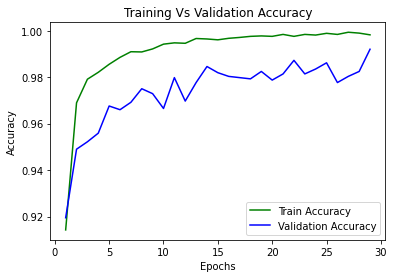

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy'][:29]
validation_accuracy = history.history['val_accuracy'][:29]
epochs = range(1,30)
plt.plot(epochs,train_accuracy,'g',label='Train Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

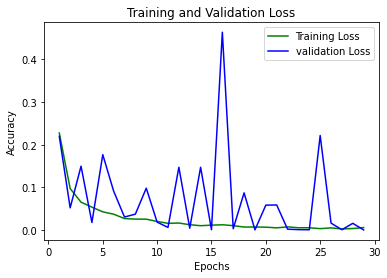

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss'][:29]
val_loss = history.history['val_loss'][:29]
epochs = range(1,30)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("covid19_high_accuracy_classification_model.json", "w") as json_file:
    json_file.write(model_json)

In [88]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
os.rename('/content/model_weights/covid19_model_19-0.982465.h5','/content/model_weights/covid19_high_accuracy_model_19-0.982465.h5')
os.rename('/content/model_weights/covid19_model_29-0.992030.h5','/content/model_weights/covid19_high_accuracy_model_29-0.992030.h5')

In [ ]:
!cp -r "/content/model_weights/covid19_high_accuracy_model_19-0.982465.h5" "/content/gdrive/My Drive/AI"
!cp -r "/content/model_weights/covid19_high_accuracy_model_29-0.992030.h5" "/content/gdrive/My Drive/AI"
!cp -r "/content/covid19_high_accuracy_classification_model.json" "/content/gdrive/My Drive/AI"

In [89]:
!cp "/content/gdrive/My Drive/AI/covid19_high_accuracy_model_29-0.992030.h5" "/content"
!cp "/content/gdrive/My Drive/AI/covid19_high_accuracy_classification_model.json" "/content"

In [90]:
from keras.models import model_from_json
# load json and create model
json_file = open('/content/covid19_high_accuracy_classification_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/covid19_high_accuracy_model_29-0.992030.h5")
print("Loaded model from disk")

Loaded model from disk


In [91]:
from keras.preprocessing import image
import numpy as np
def check_xray(path,chest_xray_type):
  predictor = {}
  path= os.path.join(path,chest_xray_type)
  for img in os.listdir(path):
    img = image.load_img(os.path.join(path,img),target_size=(350,350))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img = img / 255.0
    prediction = loaded_model.predict(img)
    prediction_class  = np.argmax(prediction)
    result = xray_types[prediction_class]
    if result not in predictor:
      predictor[result] = 1
    else:
      predictor[result] += 1
  return predictor

In [92]:
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join(train_dir,category))),category))

There are 712 COVID19 images
There are 2677 NORMAL images
There are 7363 PNEUMONIA images


In [93]:
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join(valid_dir,category))),category))

There are 125 COVID19 images
There are 559 NORMAL images
There are 1223 PNEUMONIA images


In [94]:
for category in xray_types:
  print("There are {} {} images".format(len(os.listdir(os.path.join(test_dir,category))),category))

There are 48 COVID19 images
There are 50 NORMAL images
There are 50 PNEUMONIA images


In [95]:
valid_covid19_pred = check_xray(path=valid_dir,chest_xray_type=xray_types[0])
print(valid_covid19_pred)

{'COVID19': 125}


In [96]:
valid_normal_pred = check_xray(path=valid_dir,chest_xray_type=xray_types[1])
print(valid_normal_pred)

{'NORMAL': 543, 'PNEUMONIA': 16}


In [97]:
valid_pneumonia_pred = check_xray(path=valid_dir,chest_xray_type=xray_types[2])
print(valid_pneumonia_pred)

{'PNEUMONIA': 1220, 'NORMAL': 3}


In [98]:
(1888/1907)*100

99.00367068694284

In [99]:
test_covid19_pred = check_xray(path=test_dir,chest_xray_type=xray_types[0])
print(test_covid19_pred)

{'COVID19': 48}


In [100]:
test_normal_pred = check_xray(path=test_dir,chest_xray_type=xray_types[1])
print(test_normal_pred)

{'NORMAL': 50}


In [101]:
test_pneumonia_pred = check_xray(path=test_dir,chest_xray_type=xray_types[2])
print(test_pneumonia_pred)

{'PNEUMONIA': 49, 'NORMAL': 1}


In [102]:
from keras.preprocessing import image
import numpy as np
def get_actual_labels(base_dir_path,split_type,categories):
  actual_labels = []
  path= os.path.join(base_dir_path,split_type)
  for category in categories:
    new_path = os.path.join(path,category)
    for img in os.listdir(new_path):
      actual_class= categories.index(category)
      actual_labels.append(actual_class)
  return actual_labels

In [103]:
from keras.preprocessing import image
import numpy as np
def get_prediction_labels(base_dir_path,split_type,categories):
  prediction_labels = []
  path= os.path.join(base_dir_path,split_type)
  for category in categories:
    new_path = os.path.join(path,category)
    for img in os.listdir(new_path):
      img = image.load_img(os.path.join(new_path,img),target_size=(350,350))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = loaded_model.predict(img)
      prediction_class  = np.argmax(prediction)
      prediction_labels.append(prediction_class)
  return prediction_labels

In [105]:
actual_labels = get_actual_labels(base_dir_path=base_dir,split_type='val',categories=xray_types)
print(actual_labels)
print(len(actual_labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [106]:
prediction_labels = get_prediction_labels(base_dir_path=base_dir,split_type='val',categories=xray_types)
print(prediction_labels)
print(len(prediction_labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [107]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(actual_labels,prediction_labels)
print(conf_matrix)

[[ 125    0    0]
 [   0  543   16]
 [   0    3 1220]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(69.0, 0.5, 'Predicted values')

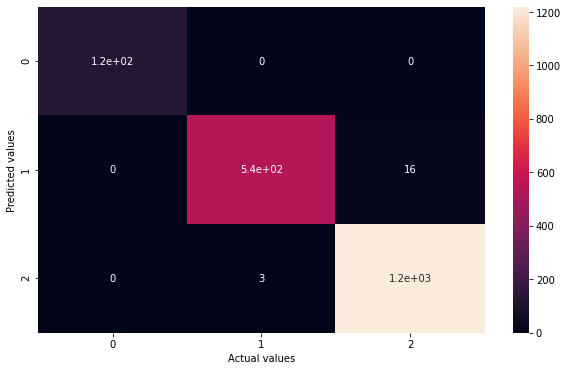

In [108]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')